# Assignment (Week 5): Visualize Different Loss Functions

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Start a tensorflow session
sess = tf.compat.v1.Session()
tf.compat.v1.disable_eager_execution()

In [3]:
# Create our sample data from a line space 
Y_pred = tf.linspace(-1., 1., 500)
#Create our target as a zero constant tensor
Y_truth = tf.constant(0.)

# L2 Norm Loss/ Euclidean Loss 

L2 Norm Loss is just square of the difference/distance between the predicted value and the true value. The L2 norm loss is good because it is curved or seem to converge near the target. Implementing this can make algorithms converge more slowly when approaching the target and avoid over-shooting the minimum.

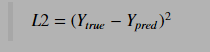

Text(0, 0.5, '$Y_{true}$')

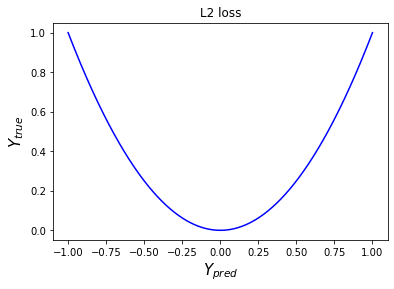

In [4]:
#Calculating the L2 loss
val = tf.square(Y_truth - Y_pred)
L2_val = sess.run(val)

#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, L2_val, 'b-', label='L2 loss' )
plt.title('L2 loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)

# L1 Norm Loss/ Absolute Loss Function

The L1 loss is similar to the L2 loss but instead of taking the square of the distance, we just take the absolute value. The L1 loss is better in detecting outliers than the L2 norm. A major point to note is that L1 loss is not smooth when close to the target/minimum and this can cause non-convergence for algorithms.

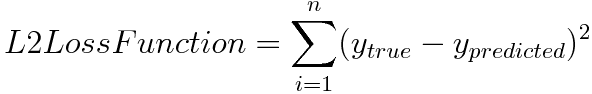

Text(0, 0.5, '$Y_{true}$')

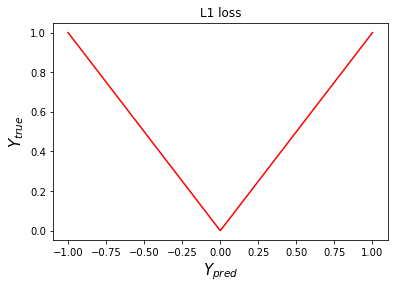

In [5]:
#Computing L1 loss with the same values 
temp = tf.abs(Y_truth - Y_pred)
L1_val = sess.run(temp)
#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, L1_val, 'r-' )
plt.title('L1 loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)

# Pseudo Hubber-Loss

Pseudo-huber loss is a variant of the Huber loss function, It takes the best properties of the L1 and L2 loss by being convex close to the target and less steep for extreme values. This loss depends on an extra parameter delta δ which dictates how steep the function will be.

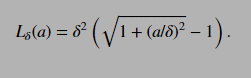

Text(0, 0.5, '$Y_{true}$')

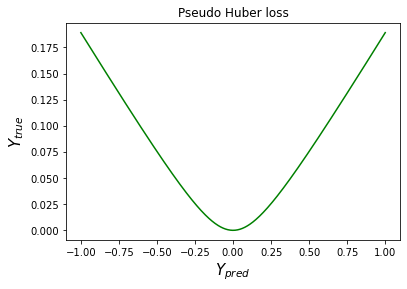

In [6]:
#Plot of the Pseudo-Huber loss
delta = tf.constant(0.24)
temp_ph = tf.multiply(tf.square(delta),tf.sqrt(1. + tf.square((Y_truth - Y_pred) / delta)) - 1. )
pseudo_h_vals = sess.run(temp_ph)

#ploting the predicted values against the L2 loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, pseudo_h_vals, 'g-' )
plt.title('Pseudo Huber loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{true}$', fontsize=15)

# Cross-Entropy Loss

Cross entropy loss is also somtimes referred to as the logistic loss function. Cross entropy loss for binary classification is used when we are predicting two classes 0 and 1. Here we wish to measure the distance from the actual class (0 or 1) to the predicted value, which is usually a real number between 0 and 1.

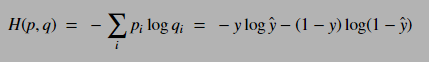

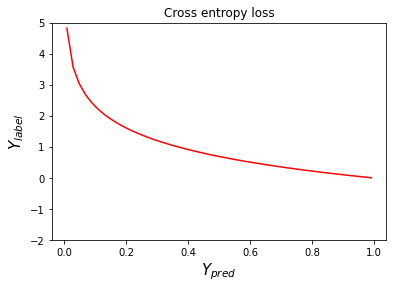

In [7]:
#Redefining our data
Y_pred = tf.linspace(-4., 6., 500)
Y_label = tf.constant(1.)
Y_labels = tf.fill([500,], 1.)

#applying sigmoid
x_entropy_vals = - tf.multiply(Y_label, tf.math.log(Y_pred)) - tf.multiply((1. - Y_label), tf.math.log(1. - Y_pred))
x_entropy_loss = sess.run(x_entropy_vals)
#ploting the predicted values against the cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_loss, 'r-' )
plt.title('Cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()

# Sigmoid Cross Entropy Loss

This is very similar to the cross entropy loss function, except that we transform the x-values by the sigmoid function before applying the cross entropy loss.

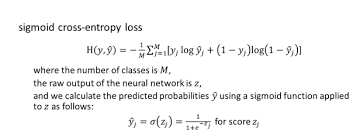

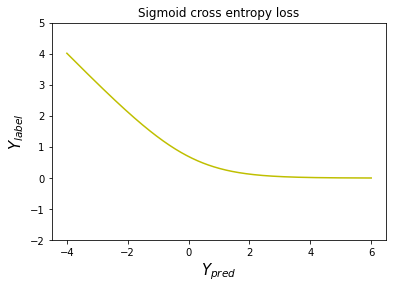

In [8]:
x_entropy_sigmoid_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels= Y_labels, logits=Y_pred)
x_entropy_sigmoid_out = sess.run(x_entropy_sigmoid_vals)
#ploting the predicted values against the Sigmoid cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_sigmoid_out, 'y-' )
plt.title('Sigmoid cross entropy loss')
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()

# Softmax Cross Entropy Loss

This loss is used to measure a loss when there is only one target category instead of multiple. Because of this, the function first uses a softmax function to transform the outputs into a probability distribution which all sums to 1, and then computes the loss function from the true probability distribution.

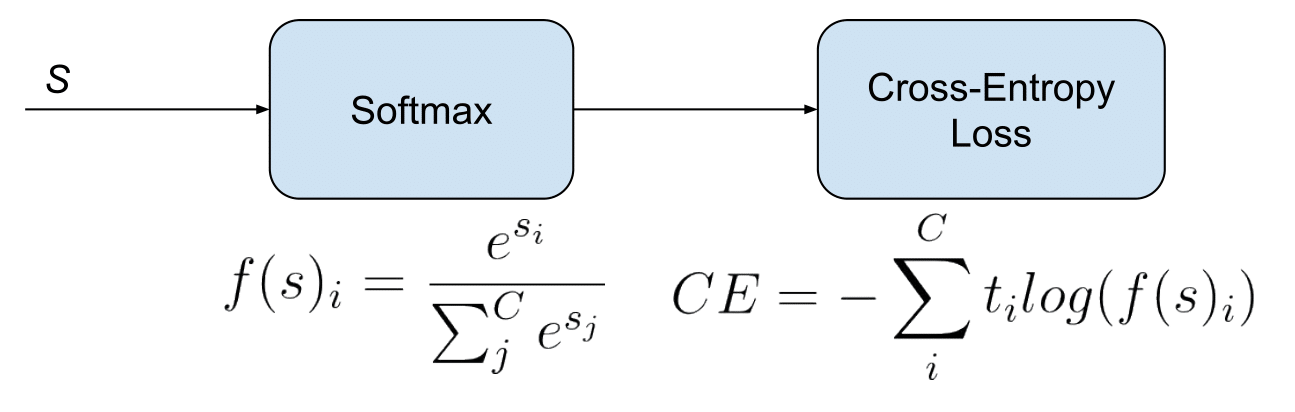

In [9]:
y_pred_dist = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist, logits=y_pred_dist)
print(sess.run(softmax_xentropy))

[1.1601256]


# Sparse Softmax Cross Entropy Loss

This loss is the same as previous one, except instead of the target being a probability distribution, it is an index of which category is true. Instead of a sparse all-zero target vector with one value of one, we just pass in the index of which category is the true value, as follows:

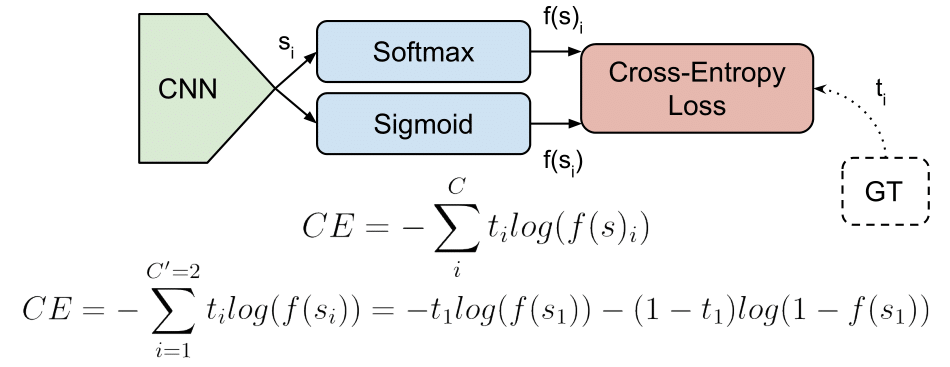

In [10]:
y_pred = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])  #true value is in the second position of the sparse tensor
sparse_x_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels= sparse_target_dist, logits=y_pred)
print(sess.run(sparse_x_entropy))

[0.00012564]


# Weighted Cross Entropy Loss

This is a weighted version of the sigmoid cross entropy loss. Here we provide a weight on the positive target. I.e the higher the weight we specify, the higher the peek of the positive values. This can be use to control the outliers for positive predictions.

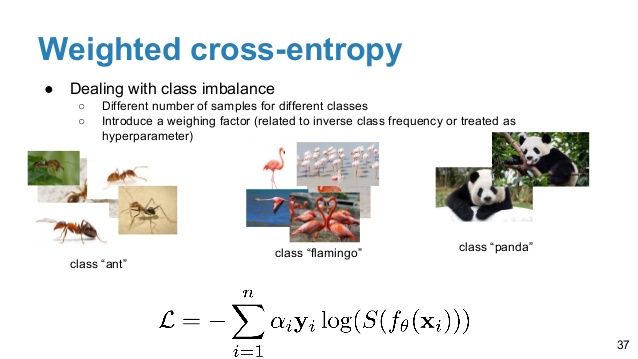

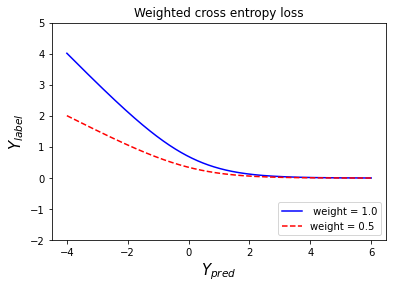

In [11]:
#comparing two weights
weight = tf.constant(1.)
x_entropy_weighted_vals = tf.nn.weighted_cross_entropy_with_logits(labels=Y_labels, logits=Y_pred, pos_weight=weight)
x_entropy_weighted_out = sess.run(x_entropy_weighted_vals)

weight2 = tf.constant(0.5)
x_entropy_weighted_val_2 = tf.nn.weighted_cross_entropy_with_logits(labels=Y_labels, logits=Y_pred, pos_weight=weight2)
x_entropy_weighted_out_2 = sess.run(x_entropy_weighted_val_2)

#ploting the predicted values against the Sigmoid cross entropy loss
Y_array = sess.run(Y_pred)
plt.plot(Y_array, x_entropy_weighted_out, 'b-', label=' weight = 1.0' )
plt.plot(Y_array, x_entropy_weighted_out_2, 'r--', label='weight = 0.5' )
plt.title('Weighted cross entropy loss')
plt.legend(loc=4)
plt.xlabel('$Y_{pred}$', fontsize=15)
plt.ylabel('$Y_{label}$', fontsize=15)
plt.ylim(-2, 5)
plt.show()